# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
import tensorflow as tf
print (tf.__version__)

2.1.0


### Change current working directory to project folder (1 mark)

In [3]:
import os
#### Add your code here ####
# Working on local enviornment, all files are present in same file 

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [4]:
import numpy as np
data = np.load('images (1).npy', mmap_mode=None, allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [5]:
data[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

In [6]:
import datetime, os

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [7]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [9]:
print ('Shape of X_train  : ',X_train.shape)

Shape of X_train  :  (409, 224, 224, 3)


In [10]:
print ('Shape of masks  : ',masks.shape)

Shape of masks  :  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

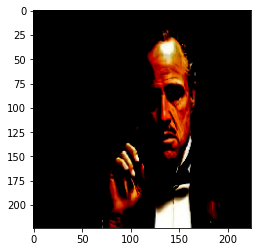

In [11]:
from matplotlib import pyplot as plt
n = 10
print(X_train[n])
plt.imshow(X_train[n])

(224, 224)

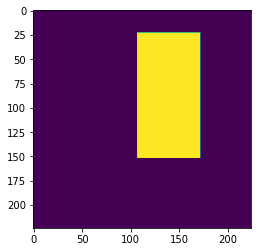

In [133]:
plt.imshow(masks[n])
masks[n].shape

In [137]:
kk = np.reshape(masks[n], masks[n].shape + (1,))
kk.shape

(224, 224, 1)

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

## Model Creation

In [14]:
def create_model(trainable=True):
    model =MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    
    block1 = model.get_layer("conv_pw_5_relu").output #28
    block2 = model.get_layer("conv_pw_11_relu").output #14
    block3 = model.get_layer("conv_pw_13_relu").output #7
    block4 = model.get_layer("conv_pw_3_relu").output #56
    block5 = model.get_layer("conv_pw_1_relu").output #112
    
    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block5])
    # Upsampling is done to match the output size with the size of the lables 224 by 224 in this case.
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="relu")(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [15]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [16]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [17]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [18]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

# Launching TensorBoard.

In [76]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='C:/Users/admin/Desktop/logs/',profile_batch = 100000000)



In [77]:
#loading tensorbord extension
#%load_ext tensorboard
%reload_ext tensorboard


In [190]:
#starting Tensorboar
%tensorboard --logdir 'C:/Users/admin/Desktop/logs/'

Reusing TensorBoard on port 6006 (pid 3432), started 19:33:19 ago. (Use '!kill 3432' to kill it.)

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [119]:
model.fit(X_train,masks,
                    epochs=200,
                    callbacks=[tensorboard, checkpoint, reduce_lr, stop],
                    workers=1,batch_size=1,
                    use_multiprocessing=False,
                    shuffle=True,
                    verbose=1)

Train on 409 samples
Epoch 1/200
408/409 [============================>.] - ETA: 0s - loss: 0.8737 - dice_coefficient: 0.5226
Epoch 00001: loss improved from 0.89212 to 0.87325, saving model to model-0.87.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.8733 - dice_coefficient: 0.5227
Epoch 2/200
408/409 [============================>.] - ETA: 0s - loss: 0.8302 - dice_coefficient: 0.5363
Epoch 00002: loss improved from 0.87325 to 0.82976, saving model to model-0.83.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.8298 - dice_coefficient: 0.5366
Epoch 3/200
408/409 [============================>.] - ETA: 0s - loss: 0.8021 - dice_coefficient: 0.5487
Epoch 00003: loss improved from 0.82976 to 0.80214, saving model to model-0.80.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.8021 - dice_coefficient: 0.5487
Epoch 4/200
408/409 [============================>.] - ETA: 0s - loss: 0.7578 - dice_coefficient: 0.5662
Epoc

408/409 [============================>.] - ETA: 0s - loss: 0.4305 - dice_coefficient: 0.7402
Epoch 00029: loss improved from 0.44167 to 0.43030, saving model to model-0.43.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.4303 - dice_coefficient: 0.7403
Epoch 30/200
408/409 [============================>.] - ETA: 0s - loss: 0.4198 - dice_coefficient: 0.7459
Epoch 00030: loss improved from 0.43030 to 0.42007, saving model to model-0.42.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.4201 - dice_coefficient: 0.7460
Epoch 31/200
408/409 [============================>.] - ETA: 0s - loss: 0.4136 - dice_coefficient: 0.7503
Epoch 00031: loss improved from 0.42007 to 0.41364, saving model to model-0.41.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.4136 - dice_coefficient: 0.7504
Epoch 32/200
408/409 [============================>.] - ETA: 0s - loss: 0.4058 - dice_coefficient: 0.7554
Epoch 00032: loss improved from 0.

408/409 [============================>.] - ETA: 0s - loss: 0.2765 - dice_coefficient: 0.8413
Epoch 00057: loss improved from 0.27838 to 0.27646, saving model to model-0.28.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.2765 - dice_coefficient: 0.8414
Epoch 58/200
408/409 [============================>.] - ETA: 0s - loss: 0.2770 - dice_coefficient: 0.8416
Epoch 00058: loss did not improve from 0.27646
409/409 [==============================] - 274s 669ms/sample - loss: 0.2767 - dice_coefficient: 0.8418
Epoch 59/200
408/409 [============================>.] - ETA: 0s - loss: 0.2743 - dice_coefficient: 0.8435
Epoch 00059: loss improved from 0.27646 to 0.27443, saving model to model-0.27.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.2744 - dice_coefficient: 0.8433
Epoch 60/200
408/409 [============================>.] - ETA: 0s - loss: 0.2679 - dice_coefficient: 0.8477
Epoch 00060: loss improved from 0.27443 to 0.26766, saving model to m

Epoch 86/200
408/409 [============================>.] - ETA: 0s - loss: 0.2156 - dice_coefficient: 0.8851
Epoch 00086: loss improved from 0.21689 to 0.21549, saving model to model-0.22.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.2155 - dice_coefficient: 0.8851
Epoch 87/200
408/409 [============================>.] - ETA: 0s - loss: 0.2147 - dice_coefficient: 0.8859
Epoch 00087: loss improved from 0.21549 to 0.21499, saving model to model-0.21.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.2150 - dice_coefficient: 0.8856
Epoch 88/200
408/409 [============================>.] - ETA: 0s - loss: 0.2130 - dice_coefficient: 0.8871
Epoch 00088: loss improved from 0.21499 to 0.21329, saving model to model-0.21.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.2133 - dice_coefficient: 0.8869
Epoch 89/200
408/409 [============================>.] - ETA: 0s - loss: 0.2130 - dice_coefficient: 0.8869
Epoch 00089: loss imp

408/409 [============================>.] - ETA: 0s - loss: 0.1883 - dice_coefficient: 0.9049
Epoch 00115: loss improved from 0.18871 to 0.18823, saving model to model-0.19.h5
409/409 [==============================] - 274s 670ms/sample - loss: 0.1882 - dice_coefficient: 0.9048
Epoch 116/200
408/409 [============================>.] - ETA: 0s - loss: 0.1880 - dice_coefficient: 0.9051
Epoch 00116: loss improved from 0.18823 to 0.18797, saving model to model-0.19.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.1880 - dice_coefficient: 0.9050
Epoch 117/200
408/409 [============================>.] - ETA: 0s - loss: 0.1879 - dice_coefficient: 0.9054
Epoch 00117: loss improved from 0.18797 to 0.18771, saving model to model-0.19.h5
409/409 [==============================] - 274s 669ms/sample - loss: 0.1877 - dice_coefficient: 0.9053
Epoch 118/200
408/409 [============================>.] - ETA: 0s - loss: 0.1869 - dice_coefficient: 0.9058
Epoch 00118: loss improved from

#### we can observe that loss did not improve from 0.17667 and early spoting is achived at dice_coefficient 91.18%

dict_keys(['loss', 'dice_coefficient', 'lr'])


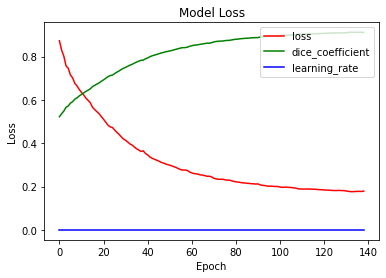

In [120]:
# list all data in history
print(model.history.history.keys())

# Summary - History for loss

plt.plot(model.history.history['loss'], color = 'red')
plt.plot(model.history.history['dice_coefficient'], color = 'green')
plt.plot(model.history.history['lr'], color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'dice_coefficient', 'learning_rate'], loc='upper right')
plt.show();

In [121]:
"""

WEIGHTS_FILE = "Model_0.22.h5"

model = create_model()
model.load_weights(WEIGHTS_FILE)

print('Done')
"""

'\n\nWEIGHTS_FILE = "Model_0.22.h5"\n\nmodel = create_model()\nmodel.load_weights(WEIGHTS_FILE)\n\nprint(\'Done\')\n'

### Get the predicted mask for a sample image   (3 marks)

In [203]:
n = 10
sample_image = X_train[n]
img = np.array([sample_image])
# Predicted Mask for a sample image
predicted_mask = model.predict(img)[0]

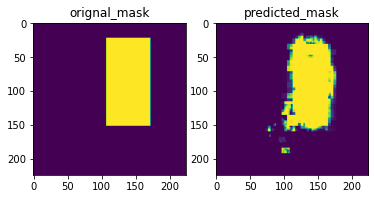

In [204]:
fig, (ax,ax1) = plt.subplots(1,2)
ax1.set_title('predicted_mask')
ax1.imshow(predicted_mask)
ax.set_title('orignal_mask')
ax.imshow(masks[n])

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


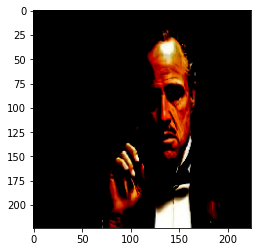

In [205]:
plt.imshow(X_train[n])

In [206]:
# To conver predicted mask from 2d to 3d i mean from 224*224 to 224*224*1 . so that python brodcasting could be done
predicted_mask_3d = np.reshape(predicted_mask, predicted_mask.shape + (1,))

In [207]:
out = X_train[n] * (1.0 - 0.7) + predicted_mask_3d * .7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


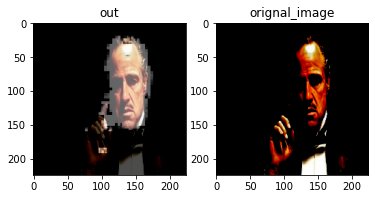

In [208]:
fig, (ax3,ax2) = plt.subplots(1,2)
ax3.set_title('out')
ax3.imshow(out)
ax2.set_title('orignal_image')
ax2.imshow(X_train[n])

# Saving arrays into images to access them through cv2

In [209]:
from PIL import Image

im = Image.fromarray(np.array(X_train[n]*255).astype(np.uint8))
im2 = Image.fromarray(np.array(predicted_mask*255).astype(np.uint8))
im.save("test_1.jpeg")
im2.save("mask_test1.png")

### Using contour mapps and drawing it back on orignal image 

In [210]:
import numpy as np
import cv2

# Load images as greyscale but make main RGB so we can annotate in colour
seg  = cv2.imread('mask_test1.png',cv2.IMREAD_GRAYSCALE)
main0 = cv2.imread('test_1.jpeg')
main1 = cv2.imread('test_1.jpeg',cv2.IMREAD_GRAYSCALE)
main = cv2.cvtColor(main1,cv2.COLOR_GRAY2BGR)

# Dictionary giving RGB colour for label (segment label) - label 1 in red, label 2 in yellow
RGBforLabel = { 1:(0,0,255), 2:(0,255,255) }

# Find external contours
contours,_ = cv2.findContours(seg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# Iterate over all contours
for i,c in enumerate(contours):
    # Find mean colour inside this contour by doing a masked mean
    mask = np.zeros(seg.shape, np.uint8)
    cv2.drawContours(mask,[c],-1,(255,0,255), -1)
    
    # DEBUG: cv2.imwrite(f"mask-{i}.png",mask)
    mean,_,_,_ = cv2.mean(seg, mask=mask)
    # DEBUG: print(f"i: {i}, mean: {mean}")

    # Get appropriate colour for this label
    label = 2 if mean > 1.0 else 1
    colour = RGBforLabel.get(label)
    # DEBUG: print(f"Colour: {colour}")

    # Outline contour in that colour on main image, line thickness=1
    cv2.drawContours(main,[c],-1,colour,1)
    dst = cv2.addWeighted(main1, 0.5, seg, 0.5, 1)
# Save result
cv2.imwrite('result.png',main)
cv2.imwrite('result2.png',dst)


True

In [211]:
# new window will pop out  
cv2.imshow('frame',dst)
cv2.waitKey(0)& 0xFF == ord('q')

False

In [212]:
# new window will pop out  
cv2.imshow('frame',main)
cv2.waitKey(0)& 0xFF == ord('q')

False

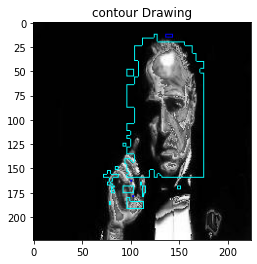

In [213]:
plt.title('contour Drawing')
plt.imshow(main);

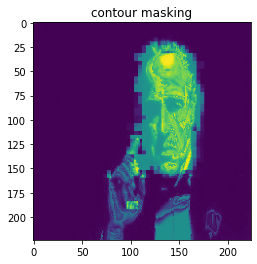

In [187]:
plt.title('contour masking')
plt.imshow(dst);

# Conculssion 

- It is evident that our model is detecting faeces well
- We are trainig our model on 409 images if the data set is increased we can still improve the dice coef
- tried three different ways for applying predicted mask on orignal image viz. 
    1. Using weighted image concatination
    2. using cv2 contour drawing 
    3. cv2 addweight method to fill predicted mask 
